In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
iris = pd.read_csv('iris.csv', skiprows = 1,
                  names = ['sepal-length','sepal-width','patel-length','patel-width','class'])

iris.head()

,sepal-length,sepal-width,patel-length,patel-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris = iris.sample(frac=1).reset_index(drop=True)
iris.head()

,sepal-length,sepal-width,patel-length,patel-width,class
0,4.4,2.9,1.4,0.2,Iris-setosa
1,6.5,3.0,5.8,2.2,Iris-virginica
2,6.3,3.3,4.7,1.6,Iris-versicolor
3,5.8,2.7,5.1,1.9,Iris-virginica
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [10]:
#Lets preprocess data to numeric

from sklearn import preprocessing 

label_encoding = preprocessing.LabelEncoder()

#iris['class'] = preprocessing.LabelEncoder().fit_transform(iris['class'].astype(str))
iris['class'] = label_encoding.fit_transform(iris['class'].astype(str))

iris.head()

,sepal-length,sepal-width,patel-length,patel-width,class
0,4.4,2.9,1.4,0.2,0
1,6.5,3.0,5.8,2.2,2
2,6.3,3.3,4.7,1.6,1
3,5.8,2.7,5.1,1.9,2
4,5.4,3.9,1.7,0.4,0


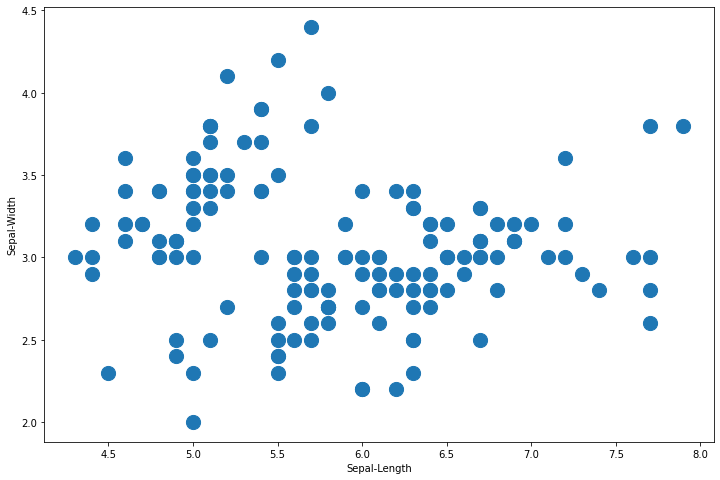

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['sepal-length'], iris['sepal-width'], s = 200)

plt.xlabel('Sepal-Length')
plt.ylabel('Sepal-Width')

plt.show()

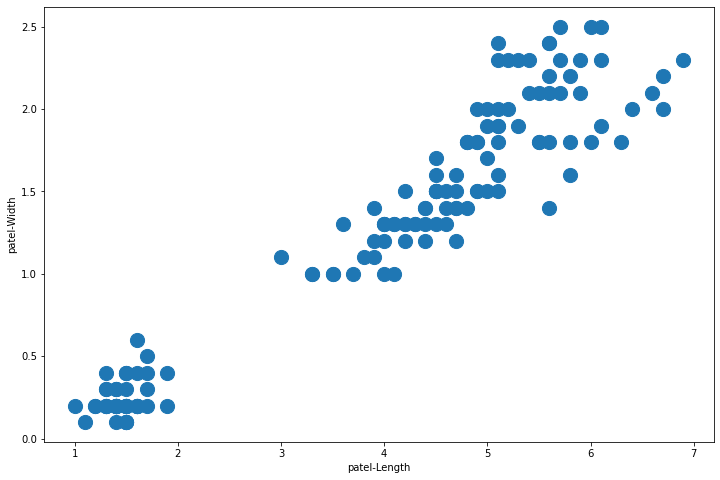

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['patel-length'], iris['patel-width'], s = 200)

plt.xlabel('patel-Length')
plt.ylabel('patel-Width')

plt.show()

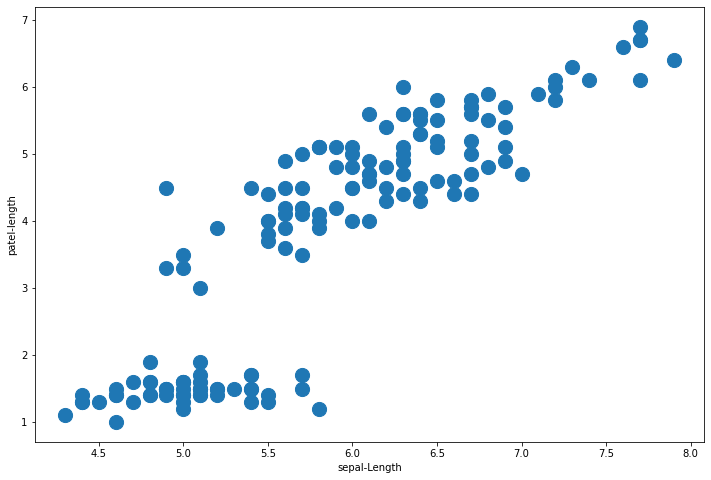

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['sepal-length'], iris['patel-length'], s = 200)

plt.xlabel('sepal-Length')
plt.ylabel('patel-length')

plt.show()

In [16]:
iris_2D = iris[['sepal-length','patel-length']]
iris_2D.sample(5)

,sepal-length,patel-length
106,6.8,4.8
133,5.0,3.3
72,4.4,1.3
51,5.8,3.9
20,5.7,4.5


In [17]:
iris_2D.shape

(150, 2)

In [18]:
iris_2D = np.array(iris_2D)

In [19]:
kmeans_model_2D = KMeans(n_clusters = 3, max_iter = 1000).fit(iris_2D)

In [22]:
#Labels assigned by k-means may not match the actual label in our data- these labels just represent clusters

kmeans_model_2D.labels_

array([1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2,
       2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 0], dtype=int32)

In [23]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

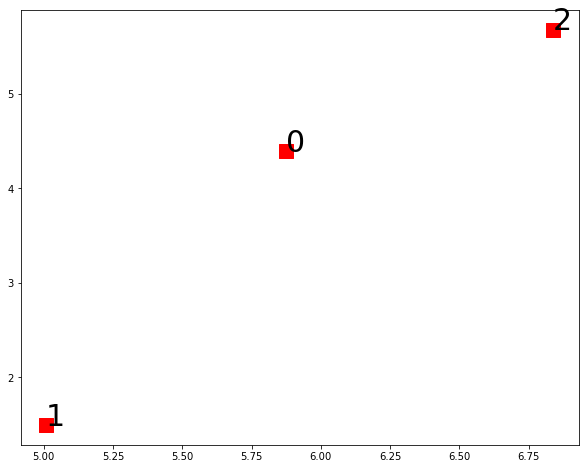

In [28]:
fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c = 'r', s = 200, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [29]:
iris_labels = iris['class']

In [30]:
#iris_labels - original labels that we've assigned 
#kmeans_model_2D.labels_ - labels that are generated by our model

print('Homogeneity Score : ', metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print('Completeness Score : ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print('V-Measure Score : ', metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted Rand Score : ', metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted Mutual Score : ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))

print('Silhouette Score : ', metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity Score :  0.7033177646052958
Completeness Score :  0.7096993707802843
V-Measure Score :  0.706494157075837
Adjusted Rand Score :  0.6988627672348092
Adjusted Mutual Score :  0.7028024531409135
Silhouette Score :  0.5890612474062568


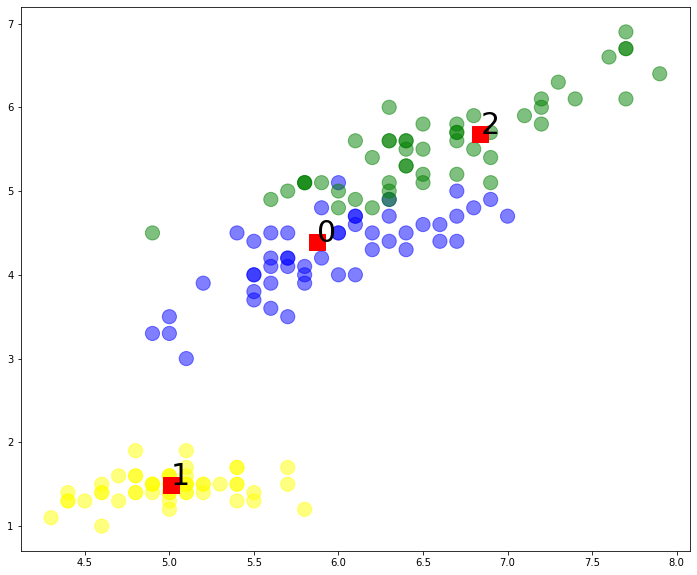

In [42]:
colors = ['yellow', 'blue','green']

plt.figure(figsize = (12, 10))

plt.scatter(iris['sepal-length'], iris['patel-length'], c = iris['class'], s=200,
           cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0] , centroids_2D[i][1]), fontsize = 30)

In [44]:
iris_features = iris.drop('class', axis = 1)
iris_features.head()

,sepal-length,sepal-width,patel-length,patel-width
0,4.4,2.9,1.4,0.2
1,6.5,3.0,5.8,2.2
2,6.3,3.3,4.7,1.6
3,5.8,2.7,5.1,1.9
4,5.4,3.9,1.7,0.4


In [45]:
iris_labels = iris['class']
iris_labels.head()

0    0
1    2
2    1
3    2
4    0
Name: class, dtype: int64

In [47]:
kmeans_model = KMeans(n_clusters = 3).fit(iris_features)

In [48]:
kmeans_model.labels_

array([1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2], dtype=int32)

In [49]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [50]:
#iris_labels - original labels that we've assigned 
#kmeans_model_2D.labels_ - labels that are generated by our model

print('Homogeneity Score : ', metrics.homogeneity_score(iris_labels, kmeans_model.labels_))

print('Completeness Score : ', metrics.completeness_score(iris_labels, kmeans_model.labels_))

print('V-Measure Score : ', metrics.v_measure_score(iris_labels, kmeans_model.labels_))

print('Adjusted Rand Score : ', metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))

print('Adjusted Mutual Score : ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))

print('Silhouette Score : ', metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity Score :  0.7514854021988338
Completeness Score :  0.7649861514489815
V-Measure Score :  0.7581756800057784
Adjusted Rand Score :  0.7302382722834697
Adjusted Mutual Score :  0.7551191675800485
Silhouette Score :  0.5525919445499756
